# Project structre notes
- `other-stateful` - older implementation of q-learning with states
- `rl` - helper functions from https://github.com/wangjksjtu/rl-perturbed-reward

# Intro

This notebook runs through the main classes.

Based on:
- Adapting Virtual Embodiment Through Reinforcement Learning (Prossute et al.)
- Reinforcement Learning with Perturbed Rewards (Wang et al.)

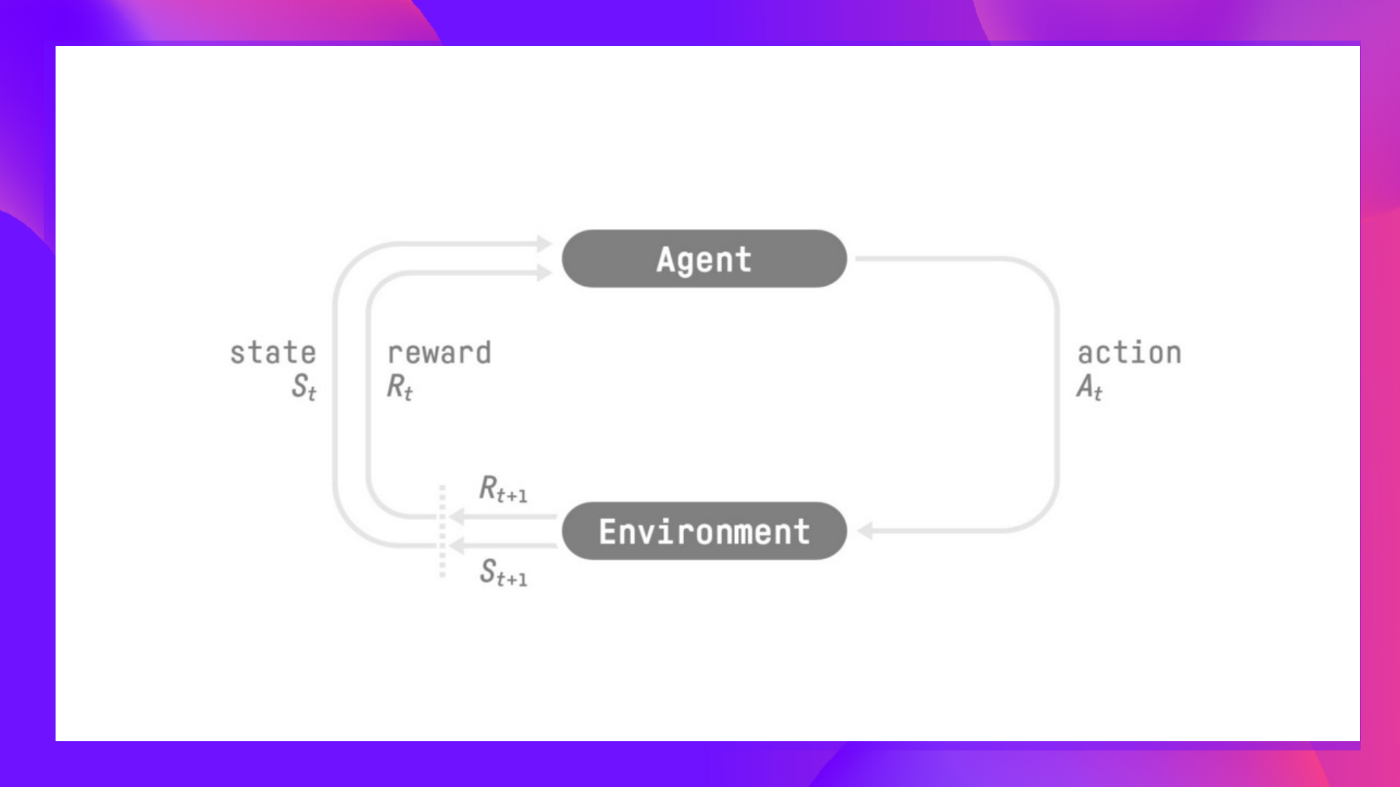

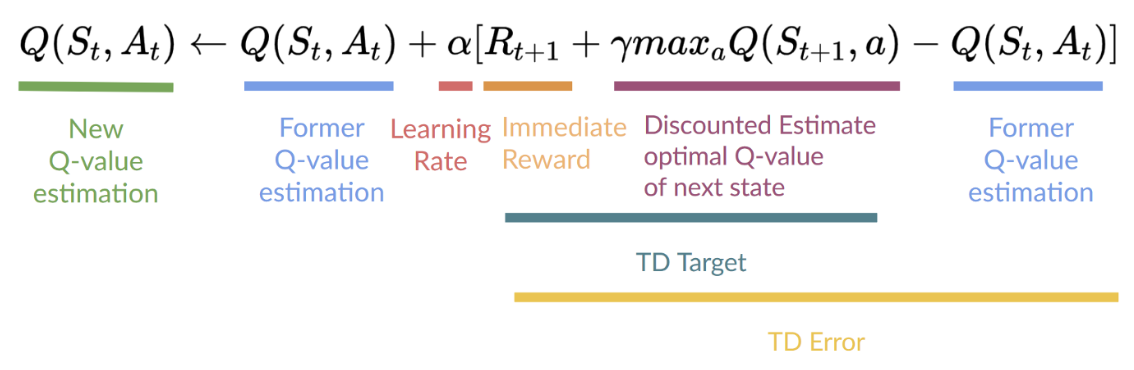

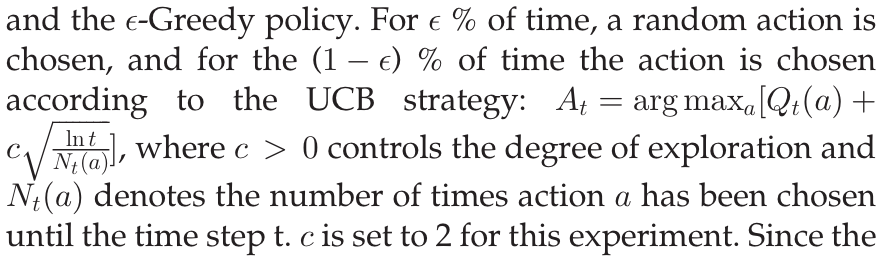

# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import noise_estimator

The initial agent and environment implementation had multiple states. We then decided on a stateless setting. At that point, it was easier to create a new `_stateless` wrapper class, which inherits from the multi classes, but sets `num_states=1`

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt

import utils
from utils import *
from modified_pendulum_processor import ModifiedPendulumProcessor

# Params

In [5]:
params_new = {
    'plots': True,
    }

params = default_params() | params_new

# Noiseless rewards UCB Q-learning

Q-table:
[[-6.2083 -5.7937 -5.6812 -6.4312 -8.115  -7.5567 -8.3065]]
Number of times action was taken:
[[11. 35. 35.  7.  5.  4.  3.]]
Total timesteps:
94


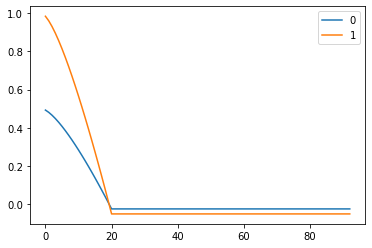

In [6]:
params_new = {
    'noise': False,
    }
params = params | params_new

agent = UCBQAgent(params=params)

q_values_for_chart, rewards, episode_length, selected_action, reward_processor, alphas, epsilons = runner(agent=agent, params=params)
utils.print_agent_stats(agent)
pd.DataFrame([alphas, epsilons]).T.plot()

100%|██████████| 1/1 [00:00<00:00, 228.01it/s]

Accuracy: 0.0
Mean episode length: 113.0


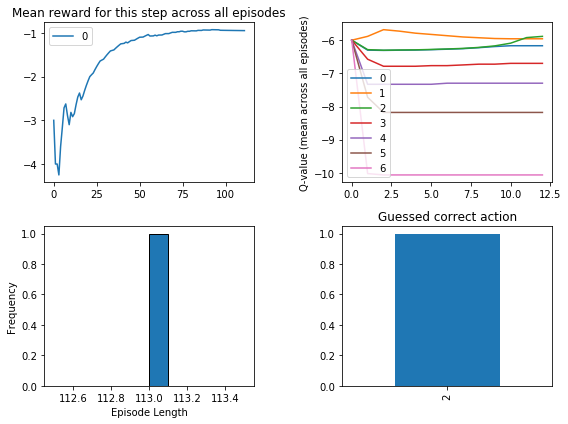

array([ -6.1671,  -5.9576,  -5.8848,  -6.6987,  -7.2973,  -8.1788,
       -10.0638])

In [7]:
params_new = {
    'num_episodes': 1,
    'noise': False,
    }
params = params | params_new

plot_mean_q_values(params=params)

# Noisy rewards
- rewards are now noisy
- q-learner hasn't changed

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

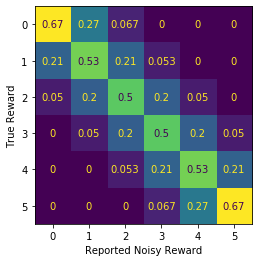

True

In [9]:
params = default_params()
num_actions = params['num_actions']
correct_action = params['correct_action']
# params['diag'] = 0.69
# Confusion matrix used as noise
num_unique_rewards = utils.get_num_unique_rewards(num_actions=num_actions, correct_action=correct_action)
cmat = ModifiedPendulumProcessor(num_unique_rewards=num_unique_rewards).initialize_cmat()
disp = ConfusionMatrixDisplay(cmat)
ax = disp.plot(colorbar=False).ax_
ax.set_ylabel('True Reward')
ax.set_xlabel('Reported Noisy Reward') 
plt.show()
noise_estimator.is_invertible(cmat)

100%|██████████| 100/100 [00:00<00:00, 365.93it/s]


Accuracy: 16.0
Mean episode length: 66.79
Last reward processor:
Estimated confusion matrix:


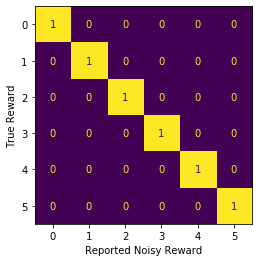

Reward sets:
(0, 0): [0, -1, -1, -2, 0, -1, -2, -1, -2, -1, -1, -2, 0]
(0, 1): [-1, 0, -2, 0, 0, -1, 0, 0, -1, 0, -1, -1, -1, 0, 0, -1, 0, 0, 0]
(0, 2): [-2, -1, 0, -1, -1]
(0, 3): [-3, -3, -2, -2]
(0, 4): [-4, -5, -3]
(0, 5): [-3, -4, -4, -4, -4, -4, -4, -3, -5, -3, -3, -3, -4, -4, -4, -5, -5, -5, -4, -4]
(0, 6): [-5, -5, -5]
Reward set counts:
Key (0, 0): 13 items
Key (0, 1): 19 items
Key (0, 2): 5 items
Key (0, 3): 4 items
Key (0, 4): 3 items
Key (0, 5): 20 items
Key (0, 6): 3 items


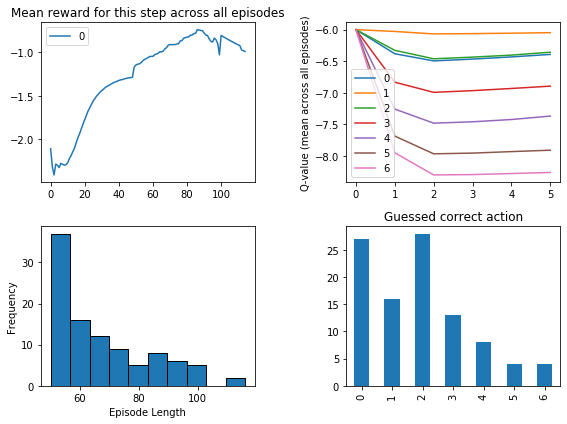

array([-6.39276 , -6.047673, -6.357846, -6.895436, -7.370488, -7.911392,
       -8.264574])

In [10]:
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# params=res['params']
params = default_params()
params['plots'] = True
plot_mean_q_values(params=params)

# Surrogate rewards

100%|██████████| 1/1 [00:00<00:00, 22.93it/s]

Accuracy: 0.0
Mean episode length: 1200.0
Last reward processor:
Estimated confusion matrix:


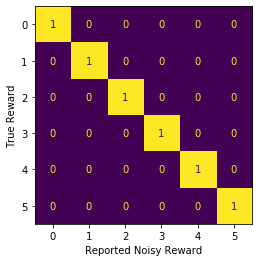

Reward sets:
(0, 0): [-1, -1, -1, -1, -2, -1, -2, -1, -2, -1, -1, -1, -1, -1, -1, 0, -1, -3, 0, -1, -3, 0, -2, -1, -1, -2, -1, 0, -1, -1, -1, -1, -1, -1, 0, -2, 0, 0, -1, 0, -3, -2, 0, -3, -1, -1, -1, -3, -1, -1, -2, -1, 0, -1, -3, -1, -1, -2, -1, -1, -3, -1, -2, -1, -1, -1, -1, 0, -1, -2, -1, 0, -2, -1, -1, -3, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1]
(0, 1): [0, -1, -1, -1, 0, -2, 0, -2, 0, 0, 0, 0, -1, -1, 0, 0, -2, 0, -2, -1, -1, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, -1, -2, 0, 0, 0, -1, 0, 0, 0, 0, 0, -2, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, -1, 0, 0, -2, 0, 0, -2, 0, 0, 0, -1, 0, 0, -2, 0, -1, 0, 0, 0, 0, -1, 0, -2, 0, -1, 0, 0, 0, -1]
(0, 2): [-2, -3, -1, -1, -1, -1, -1, -1, -2, -1, -3, -1, -2, 0, -1, -1, -1, -1, -1, -1, -2, -1, -2, -1, -1, -1, -2, 0, -1, -3, 0, 0, -1, 0, -2, 0, -2, -1, -1, 0, 0, 0, -2, -1, 0, -1, -1, 0, 0, -1, -1, -2, -2, -1, -1, -1, 0, -1, -1, -1, 0, -2, -1, -1, -2, -2, 0, -2, -1, -2, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, 0, -1, -1, -1]
(0

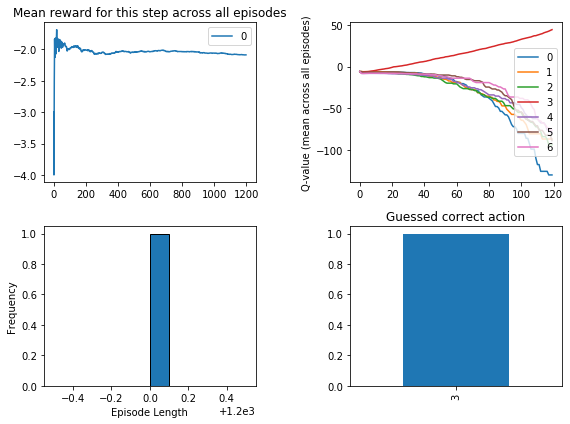

array([-130.1349,  -87.0118,  -94.1136,   44.3121,  -78.9934,  -88.983 ,
        -76.3183])

In [11]:
# When we always pick at random, we never end up consistently picking the same action
# so the episode end is never triggered by. 
# Therefore the agent has enough observations to properly estimate the noise matrix
params_new ={
    'max_steps': 1200,
    'num_episodes': 1,
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # epsilon min must be high, otherwise we never end up with a convertable matrix
    # and never end up using the surrogate rewards
    'epsilon_min': 0.5,
    'diag': 0.5
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 398.59it/s]


Accuracy: 25.0
Mean episode length: 65.68
Last reward processor:
Estimated confusion matrix:


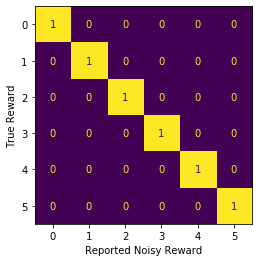

Reward sets:
(0, 0): [-1, -1, -1, 0, -1, -1, -1]
(0, 1): [0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0]
(0, 2): [-1, 0, -1, 0, -2, -1, -1, -1, -1, -2, -1, -1, -1, -3, -2, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, -2, -2]
(0, 3): [-1, -1, -1, -3, -1, -2, -1]
(0, 4): [-3, -3]
(0, 5): [-4, -3]
(0, 6): [-5, -4]
Reward set counts:
Key (0, 0): 7 items
Key (0, 1): 24 items
Key (0, 2): 27 items
Key (0, 3): 7 items
Key (0, 4): 2 items
Key (0, 5): 2 items
Key (0, 6): 2 items


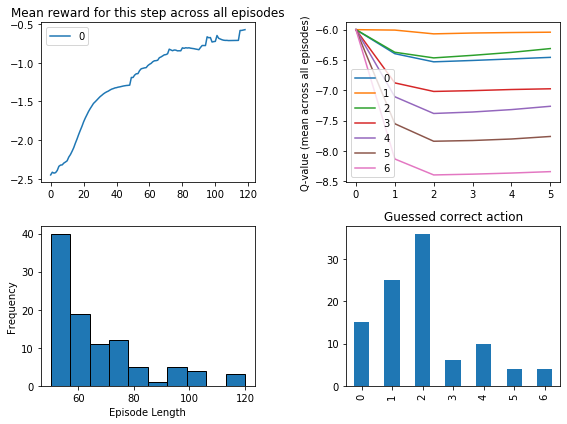

array([-6.457255, -6.041867, -6.312185, -6.976018, -7.264792, -7.763219,
       -8.343696])

In [12]:
params_new ={
    'max_steps': 120,
    'num_episodes': 100,
    'noise': True, 
    'surrogate': True, 
    'plots': True,
    'diag': 0.5
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

100%|██████████| 100/100 [00:00<00:00, 385.11it/s]


Accuracy: 28.999999999999996
Mean episode length: 66.65
Last reward processor:
Estimated confusion matrix:


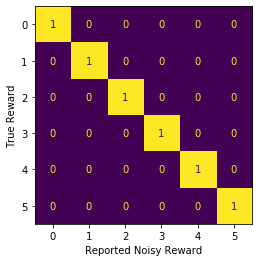

Reward sets:
(0, 0): [0, -1, -3, -2, -1, -2, -2, -1, -1]
(0, 1): [-1, 0, -1, 0, -1, -1, 0, -1, -1, -1, 0, -2, 0, 0, 0, -1, 0, 0, 0, -2, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -2, -1, 0, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, -1, 0, -1, -1, 0, 0, 0, -2, -1, -2, 0, 0, 0, -1]
(0, 2): [-2, -1, 0, -1, -1, -2, 0, 0, -1, 0, -2, -1]
(0, 3): [-1, -2, -2, -3, -1, -2]
(0, 4): [-3, -4]
(0, 5): [-5, -4]
(0, 6): [-4, -5]
Reward set counts:
Key (0, 0): 9 items
Key (0, 1): 66 items
Key (0, 2): 12 items
Key (0, 3): 6 items
Key (0, 4): 2 items
Key (0, 5): 2 items
Key (0, 6): 2 items


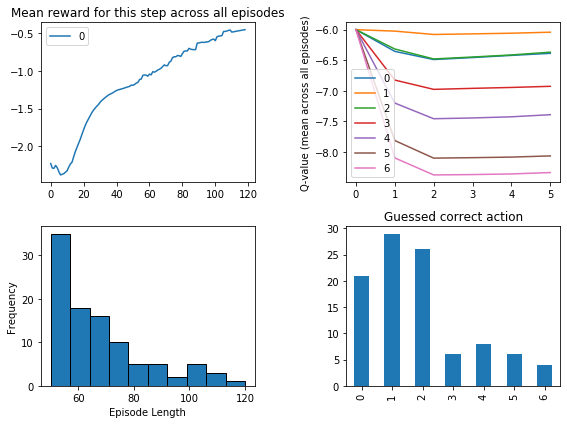

array([-6.387564, -6.041457, -6.368574, -6.927727, -7.392496, -8.067526,
       -8.339928])

In [13]:
params_new ={
    'noise': True, 
    'surrogate': True, 
    'plots': True, 
    # 'surrogate_c_interval': 10,
    }
params = default_params() | params_new
plot_mean_q_values(params = params)

# Sanity check

In [14]:
params = default_params()

print('Accuracy should be higher, timesteps should be lower')

params['noise'] = False
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = False
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

params['noise'] = True
params['surrogate'] = True
q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
mean_episode_length = np.mean(episode_lengths)
print(accuracy, mean_episode_length) 

Accuracy should be higher, timesteps should be lower


100%|██████████| 100/100 [00:00<00:00, 379.90it/s]


7.000000000000001 93.19


100%|██████████| 100/100 [00:00<00:00, 412.61it/s]


37.0 68.06


100%|██████████| 100/100 [00:00<00:00, 422.87it/s]

24.0 64.66
